<a href="https://colab.research.google.com/github/MubasharAli2020/Sentiment_Analysis/blob/main/Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas numpy nltk scikit-learn wordcloud matplotlib

In [ ]:
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
# Load the Excel file
from google.colab import files
uploaded = files.upload()

# Read the Excel file
df = pd.read_csv('/content/reviews.csv')


Saving reviews.csv to reviews (3).csv


In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string

def preprocess_text(text):
    # Tokenize the text
    tokens = word_tokenize(text.lower())
    # Remove punctuation and stopwords
    tokens = [word for word in tokens if word.isalpha() and word not in stopwords.words('english')]
    return ' '.join(tokens)

df['Cleaned_Review'] = df['text'].apply(preprocess_text)


In [ ]:
from sklearn.model_selection import train_test_split

# Assuming you have a column 'Sentiment' with labels (positive/negative)
X_train, X_test, y_train, y_test = train_test_split(df['Cleaned_Review'], df['sentiment'], test_size=0.2, random_state=42)


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)


In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

classifier = MultinomialNB()
classifier.fit(X_train_vec, y_train)

# Predict and evaluate
y_pred = classifier.predict(X_test_vec)
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')


Accuracy: 0.5


In [ ]:
def predict_sentiment(review):
    cleaned_review = preprocess_text(review)
    review_vec = vectorizer.transform([cleaned_review])
    return classifier.predict(review_vec)[0]

df['Predicted_Sentiment'] = df['text'].apply(predict_sentiment)


In [ ]:
df.to_csv('predicted_reviews.csv', index=False)
from google.colab import files
files.download('predicted_reviews.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

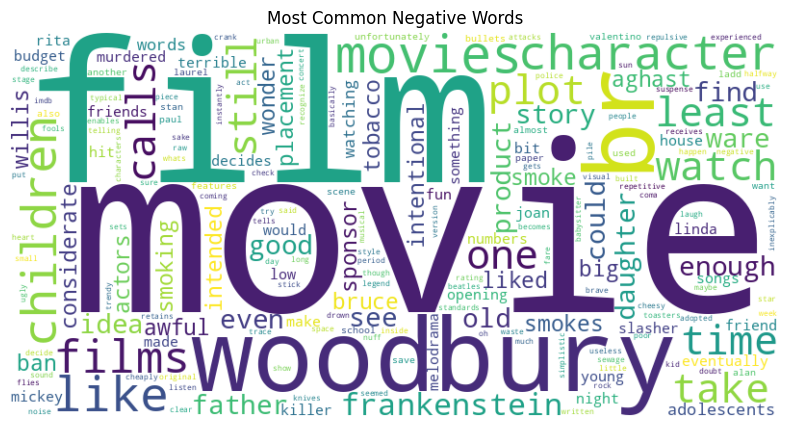

In [ ]:
negative_reviews = df[df['Predicted_Sentiment'] == 'neg']['Cleaned_Review']

# Join all negative reviews into a single string
negative_text = ' '.join(negative_reviews)

# Tokenize the negative text
negative_tokens = word_tokenize(negative_text)

# Count the frequency of each word
word_freq = Counter(negative_tokens)

# Generate a word cloud for negative words
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Negative Words')
plt.show()


[nltk_data] Downloading package opinion_lexicon to /root/nltk_data...
[nltk_data]   Package opinion_lexicon is already up-to-date!


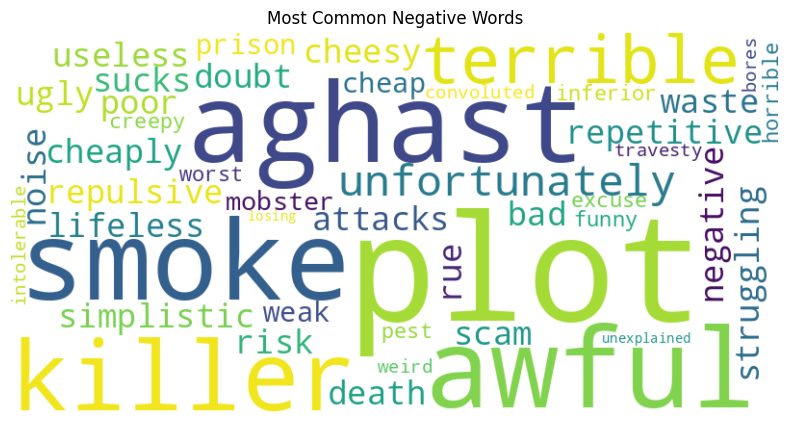

In [ ]:
from nltk.corpus import opinion_lexicon

# Load the negative words from the opinion lexicon
nltk.download('opinion_lexicon')
negative_words = set(opinion_lexicon.negative())

# Assuming you have already defined negative_reviews
# Join all negative reviews into a single string
negative_text = ' '.join(negative_reviews)

# Tokenize the negative text
negative_tokens = word_tokenize(negative_text)

# Filter out only the negative words
negative_tokens_filtered = [word for word in negative_tokens if word in negative_words]

# Count the frequency of each negative word
word_freq = Counter(negative_tokens_filtered)

# Generate a word cloud for negative words
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Negative Words')
plt.show()

